# 10 – Mini Project

**Applied example combining key concepts from previous lessons.**

*Part of the [Foundations: Python, R & SQL](../README.md) repository.*

---

## Objective

We will analyze a small dataset simulating employee records. The goal is to:
- Clean and transform the data using **dplyr**
- Summarize and visualize using **ggplot2**
- Practice string and date operations

In [16]:
!pip install -q rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [17]:
%%R
# Load necessary packages
library(dplyr)
library(ggplot2)
library(lubridate)
library(stringr)

In [18]:
%%R
# Sample data frame
employees <- data.frame(
  name = c("Alice Smith", "Bob Johnson", "Carla Gomez", "David Lee", "Eva Zhang","Cheikh LO"),
  department = c("HR", "IT", "Finance", "IT", "HR","Finance"),
  start_date = as.Date(c("2022-01-15", "2021-06-10", "2023-03-01", "2022-07-20", "2020-09-05","2022-03-01")),
  salary = c(42000, 55000, 49000, 47000, 60000,70000),
  stringsAsFactors = FALSE
)

employees

         name department start_date salary
1 Alice Smith         HR 2022-01-15  42000
2 Bob Johnson         IT 2021-06-10  55000
3 Carla Gomez    Finance 2023-03-01  49000
4   David Lee         IT 2022-07-20  47000
5   Eva Zhang         HR 2020-09-05  60000
6   Cheikh LO    Finance 2022-03-01  70000


## 1. Clean and Prepare
- Add name initials
- Calculate tenure in months

In [19]:
%%R
employees <- employees %>%
  mutate(
    initials = str_extract(name, "[A-Z]"),
    tenure_months = interval(start_date, Sys.Date()) %/% months(1)
  )

head(employees)

         name department start_date salary initials tenure_months
1 Alice Smith         HR 2022-01-15  42000        A            40
2 Bob Johnson         IT 2021-06-10  55000        B            48
3 Carla Gomez    Finance 2023-03-01  49000        C            27
4   David Lee         IT 2022-07-20  47000        D            34
5   Eva Zhang         HR 2020-09-05  60000        E            57
6   Cheikh LO    Finance 2022-03-01  70000        C            39


## 2. Summary Statistics by Department

In [20]:
%%R
employees %>%
  group_by(department) %>%
  summarise(
    avg_salary = mean(salary),
    median_tenure = median(tenure_months)
  )

# A tibble: 3 × 3
  department avg_salary median_tenure
  <chr>           <dbl>         <dbl>
1 Finance         59500          33  
2 HR              51000          48.5
3 IT              51000          41  


## 3. Visualization
Compare salaries across departments.

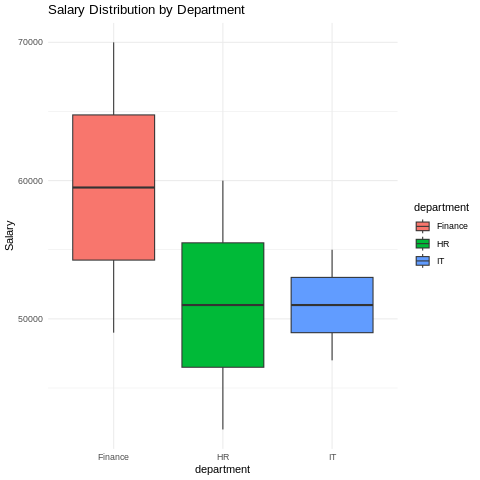

In [21]:
%%R
ggplot(employees, aes(x = department, y = salary, fill = department)) +
  geom_boxplot() +
  labs(title = "Salary Distribution by Department", y = "Salary") +
  theme_minimal()

## Summary

- Used `dplyr` for data manipulation and summary
- Applied `stringr` and `lubridate` for string and date handling
- Visualized salary patterns with `ggplot2`